ASSIGNMENT 3

Topic: Data Aggregation & Visualization

Group members:

1. CHUA HUN HO A18CS0050
2. JASMINE CHAN YUAN QI A18CS0083
3. KHOO JIE XUAN A18CS0091


TASK 1:

(a)	Load Sales Data.csv, assign it into variable named sales. 

Display the first 10 rows of the sales.



In [1]:
import pandas as pd
sales_data = pd.read_csv('Sales Data.csv')
sales_data.head(10)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,20760,207600
7,8,3700,1400,5860,9960,2860,1400,25180,251800
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


(b)	Get total profit of all months and show line plot with the following style properties:
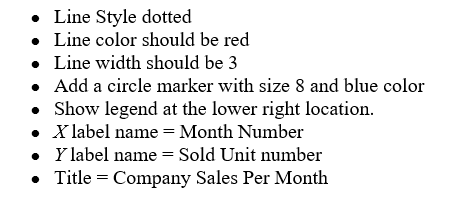


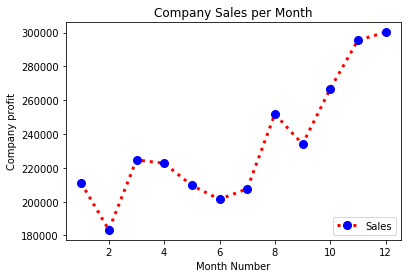

In [2]:
import matplotlib.pyplot as plt

x = sales_data.month_number
y = sales_data.total_profit

plt.figure()
plt.plot(x, y, 'r:', lw=3, marker='o', markersize=8, markerfacecolor="blue",markeredgecolor="blue")  
plt.xlabel('Month Number')
plt.ylabel('Company profit')
plt.title('Company Sales per Month')
plt.legend(['Sales'],loc=4)
plt.show()


(c)	Read data from Sales Data.csv and show all product sales using a multiline plot, sized 1200 × 600 pixels. Differentiate all the lines by line color and marker.

In [3]:
y1 = sales_data['facecream']
y2 = sales_data['facewash']
y3 = sales_data['toothpaste']
y4 = sales_data['bathingsoap']
y5 = sales_data['shampoo']
y6 = sales_data['moisturizer']

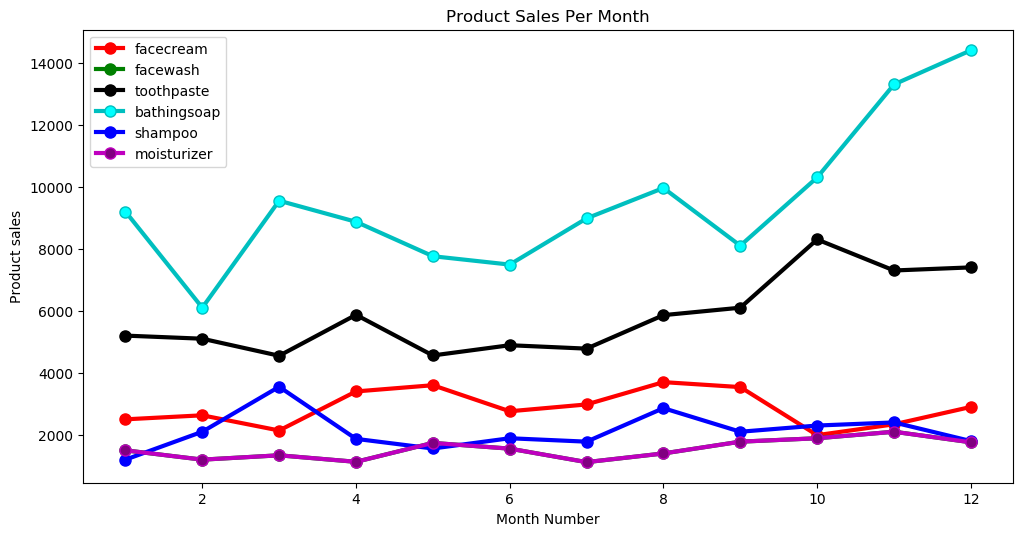

In [4]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

ax.plot(x, y1, 'r-', lw=3, marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, y2, 'g-', lw=3, marker='o', markersize=8, markerfacecolor="green")
ax.plot(x, y3, 'k-', lw=3, marker='o', markersize=8, markerfacecolor="black")
ax.plot(x, y4, 'c-', lw=3, marker='o', markersize=8, markerfacecolor="cyan")
ax.plot(x, y5, 'b-', lw=3, marker='o', markersize=8, markerfacecolor="blue")
ax.plot(x, y6, 'm-', lw=3, marker='o', markersize=8, markerfacecolor="purple")

plt.xlabel('Month Number')
plt.ylabel('Product sales')
plt.title('Product Sales Per Month')
plt.legend(['facecream', 'facewash','toothpaste','bathingsoap','shampoo','moisturizer'])
plt.show()

(d)	The products in the sales data can be further grouped as follow:

    a.	Category A: facecream, facewash, moisturizer
    b.	Category B: toothpaste
    c.	Category C: bathingsoap, shampoo
    
Group the data accordingly and obtain the following information, then plot into two subplots: 
    1.	total profit of each category for every month
    2.	percentage of each category for every month over the grand total profit of all categories.


In [5]:
cat_a = pd.pivot_table(sales_data, values=['facecream','facewash','moisturizer'], index=sales_data.index) 
cat_b = pd.pivot_table(sales_data, values=['toothpaste'], index=sales_data.index)
cat_c = pd.pivot_table(sales_data, values=['bathingsoap','shampoo'], index=sales_data.index)

In [6]:
cat_a['total_profit by month'] = cat_a.sum(axis=1)*10
cat_b['total_profit by month'] = cat_b.sum(axis=1)*10
cat_c['total_profit by month'] = cat_c.sum(axis=1)*10

cat_a['Percentage_A']=(cat_a['total_profit by month']/sales_data['total_profit'])*100
cat_b['Percentage_B']=(cat_b['total_profit by month']/sales_data['total_profit'])*100
cat_c['Percentage_C']=(cat_c['total_profit by month']/sales_data['total_profit'])*100

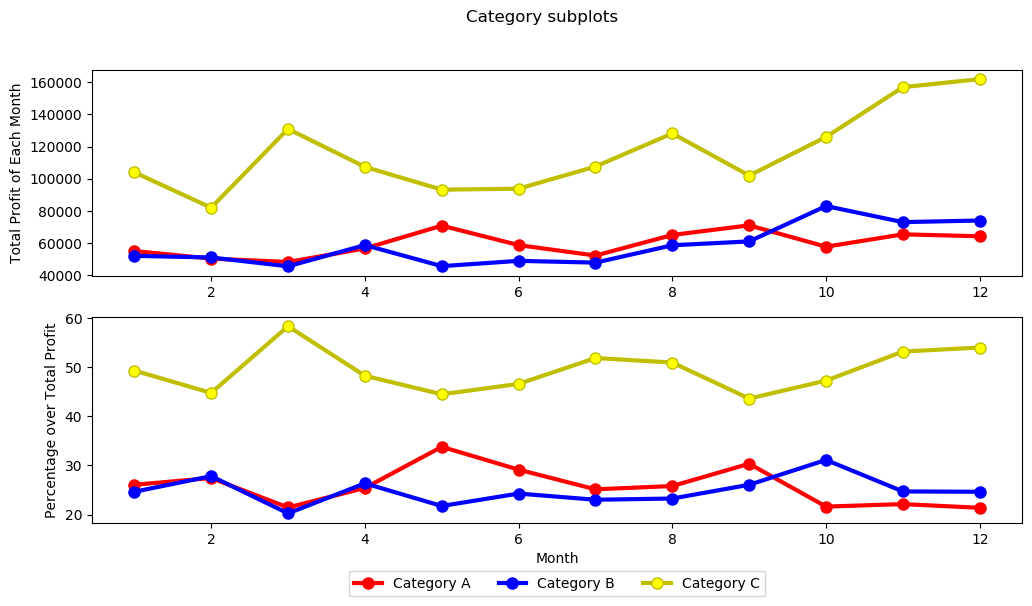

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6),dpi=100)

ax[0].plot(x, cat_a['total_profit by month'],'r-',lw=3,marker='o', markersize=8, markerfacecolor="red")
ax[0].plot(x, cat_b['total_profit by month'],'b-',lw=3,marker='o', markersize=8, markerfacecolor="blue")
ax[0].plot(x, cat_c['total_profit by month'],'y-',lw=3,marker='o', markersize=8, markerfacecolor="yellow")

ax[1].plot(x, cat_a['Percentage_A'],'r-',lw=3,marker='o', markersize=8, markerfacecolor="red") 
ax[1].plot(x, cat_b['Percentage_B'],'b-',lw=3,marker='o', markersize=8, markerfacecolor="blue")
ax[1].plot(x, cat_c['Percentage_C'],'y-',lw=3,marker='o', markersize=8, markerfacecolor="yellow")

ax[1].legend(['Category A', 'Category B','Category C'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3);
ax[1].set_xlabel('Month')
ax[0].set_ylabel('Total Profit of Each Month')
ax[1].set_ylabel('Percentage over Total Profit')
fig.suptitle('Category subplots');
plt.show()

TASK 2:
1.	Read the three datasets given below and save the data into different DataFrame.

    a.	customer.csv
    
    b.	products.csv
    
    c.	sales.csv


In [8]:
customer = pd.read_csv('customer.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

2.	From the above datasets, produce a chart (any appropriate chart) for each below:

    a.	products sold by each store
    
    b.	quantity sold against each product
    
    c.	quantity and total sales against each product


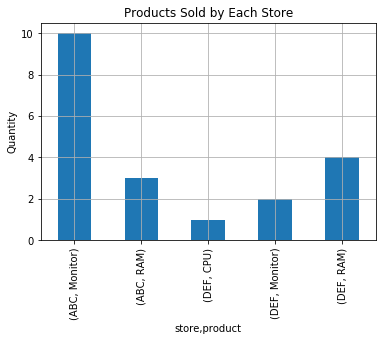

In [9]:
#a. products sold by each store

sales['qty'].groupby([sales['store'],sales['product']]).sum().plot.bar(grid=True)
plt.ylabel('Quantity')
plt.title('Products Sold by Each Store')
plt.show()

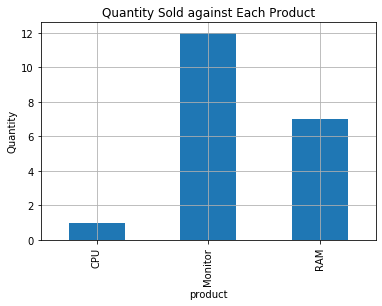

In [10]:
# b. quantity sold against each product

sales['qty'].groupby(sales['product']).sum().plot.bar(grid=True)
plt.ylabel('Quantity')
plt.title('Quantity Sold against Each Product')
plt.show()

In [11]:
# c. quantity and total sales against each product

newdf = pd.merge(sales, products)
newdf['sales']=newdf['qty']*newdf['price']
total_sales = newdf['sales'].groupby(newdf['product']).sum().reset_index()

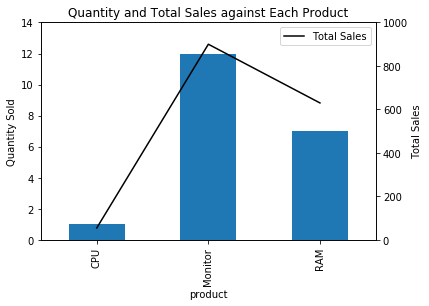

In [12]:
sales['qty'].groupby(sales['product']).sum().plot.bar()
plt.ylim(0, 14)
plt.ylabel('Quantity Sold')

axes2 = plt.twinx()
axes2.plot(total_sales['product'], total_sales['sales'], color='black')
axes2.set_ylim(0, 1000)
axes2.set_ylabel('Total Sales')
plt.title('Quantity and Total Sales against Each Product')
plt.legend(['Total Sales'],loc=1);

3.	From the above datasets, produce an output for each below:
    
    a.	quantity sold against each product against each store
    
    b.	 quantity sold against each store with total turnover of the store
    
    c.	products which are not sold
    
    d.	customers who have not purchased any product


In [13]:
# a. quantity sold against each product against each store

df = newdf['qty'].groupby([newdf['store'],newdf['product']])
df.agg([('Quantity','sum')])

Quantity
store product          
ABC   Monitor        10
      RAM             3
DEF   CPU             1
      Monitor         2
      RAM             4

In [14]:
# b. quantity sold against each store with total turnover of the store

newdf.groupby('store')[['qty','sales']].sum()

,qty,sales
store,,
ABC,13,1020
DEF,7,565


In [15]:
# c. products which are not sold

list1 = list(set(newdf['product']))
list2 = list(products['product'])

product_not_sold = [item for item in list2 if item not in list1]

product_not_sold

['Hard Disk', 'Keyboard', 'Mouse', 'Motherboard', 'Power supply']

In [16]:
#d. customers who have not purchased any product

customer_list = list(customer['c_id'])
sales_list = list(set(newdf['c_id']))
not_purchased = [ppl for ppl in customer_list if ppl not in sales_list]

customer_not_purchased = customer[(not_purchased[0]-1):]
customer_not_purchased

,c_id,Customer
4,5,King
5,7,Ronn
6,8,Jem
7,9,Tom
